## 반별 등급 인원수를 그래프로 그려보세요 

In [1]:
# 1. 데이터 접근을 위한 불리언인덱싱이 x
# 산점도 할 때 색상을 주는 매개변수

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [10]:
#apply 사용해서 평균이 90이상 1등급 80이상 2등급 70이상 3등급 60이상 4등급 60미만 재시험
def makeGrade(row):
    mean = row["mean"]
    
    if mean >= 80:
        return "1등급"
    elif mean >= 70:
        return "2등급"
    elif mean >=60:
        return "3등급"
    else:
        return "재시험"

In [8]:
exam_data = pd.read_csv('data/exam.csv')
exam_data

id  nclass  math  english  science
0     1       1    52       98       50
1     2       1    60       97       58
2     3       1    44       86       78
3     4       1    35       98       58
4     5       1    27       80       65
..  ...     ...   ...      ...      ...
95   96       5    58       98       65
96   97       5    65       68       98
97   98       5    80       78       90
98   99       5    89       68       87
99  100       5    78       83       58

[100 rows x 5 columns]

In [14]:
exam_data['mean'] = (exam_data['math']+exam_data['english']+exam_data['science'])/3
exam_data

id  nclass  math  english  science       mean
0     1       1    52       98       50  66.666667
1     2       1    60       97       58  71.666667
2     3       1    44       86       78  69.333333
3     4       1    35       98       58  63.666667
4     5       1    27       80       65  57.333333
..  ...     ...   ...      ...      ...        ...
95   96       5    58       98       65  73.666667
96   97       5    65       68       98  77.000000
97   98       5    80       78       90  82.666667
98   99       5    89       68       87  81.333333
99  100       5    78       83       58  73.000000

[100 rows x 6 columns]

In [15]:
exam_data['grade'] = exam_data.apply(makeGrade, axis=1)
exam_data

id  nclass  math  english  science       mean grade
0     1       1    52       98       50  66.666667   3등급
1     2       1    60       97       58  71.666667   2등급
2     3       1    44       86       78  69.333333   3등급
3     4       1    35       98       58  63.666667   3등급
4     5       1    27       80       65  57.333333   재시험
..  ...     ...   ...      ...      ...        ...   ...
95   96       5    58       98       65  73.666667   2등급
96   97       5    65       68       98  77.000000   2등급
97   98       5    80       78       90  82.666667   1등급
98   99       5    89       68       87  81.333333   1등급
99  100       5    78       83       58  73.000000   2등급

[100 rows x 7 columns]

In [21]:
exam_a = exam_data.groupby(['nclass','grade'], as_index=False).agg(grade_cnt = ('grade', 'count'))

<Axes: xlabel='grade', ylabel='grade_cnt'>

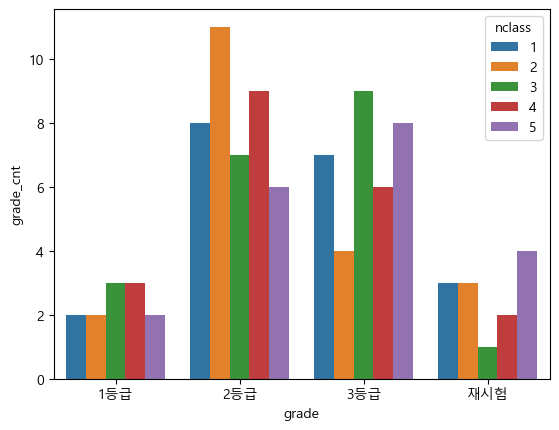

In [25]:
sns.barplot(data = exam_a, x = 'grade', y='grade_cnt',hue = 'nclass')